In [169]:
import itertools

from PIL import Image as im
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm, PowerNorm, Normalize, Colormap

import r_place_data as rpd

In [2]:
# pixels = np.zeros((2000, 2000), np.uint64)

# for item in itertools.islice(rpd.PlaceData(), 10000000):
#     if not item.is_rect:
#         pixels[item.location] += 1

In [3]:
#pixels = rpd.pixel_frequencies(5000000)

thread 7: 0
thread 2: 0
thread 3: 0
thread 4: 0
thread 5: 0
thread 1: 0
thread 0: 0
thread 10: 0
thread 9: 0
thread 8: 0
thread 11: 0
thread 6: 0
thread 7: 5000000
thread 10: 5000000
thread 9: 5000000
thread 0: 5000000
thread 1: 5000000
thread 3: 5000000
thread 2: 5000000
thread 8: 5000000
thread 5: 5000000
thread 4: 5000000
thread 11: 5000000
thread 6: 5000000
thread 7: 10000000
thread 9: 10000000
thread 0: 10000000
thread 2: 10000000
thread 5: 10000000
thread 1: 10000000
thread 4: 10000000
thread 11: 10000000
thread 8: 10000000
thread 3: 10000000
thread 6: 10000000
thread 10: 10000000


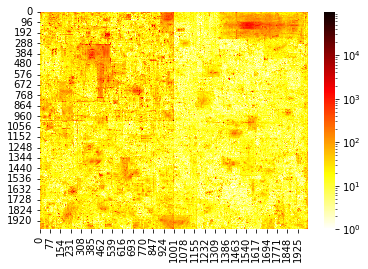

In [12]:
ax = sns.heatmap(pixels, cmap="hot_r", norm=LogNorm())
plt.show()

In [5]:
# len(rpd.PlaceData())
# 160353104

In [10]:
np.amax(pixels)

98807

In [14]:
pixels[0, 1]

9592

In [17]:
np.mean(pixels)

40.08827125

In [27]:
pixels[0, 0] = 98807

In [22]:
np.argmax(pixels) / 2000

359.282

In [23]:
pixels[359, 564] = 40

69198

In [26]:
pixels[359, 564] = 69198

In [25]:
np.amax(pixels)

55230

In [65]:
(pixels == 2).sum()

91848

In [93]:
origin_color = plt.cm.hot_r(pixels[0, 0])
origin_color

(0.0416, 0.0, 0.0, 1.0)

In [94]:
origin_color = tuple(map(lambda x: int(x * 255), origin_color))
origin_color

(10, 0, 0, 255)

In [129]:
img = im.fromarray(np.apply_along_axis(
    lambda x: tuple(x.astype(np.int64)),
    2,
    plt.cm.hot_r(pixels.astype(np.int64)) * 255,
), mode='RGBA')
imgpx = img.load()

In [131]:
img.save('out4.png')

In [95]:
imgc = im.new(size=(1, 1), color=origin_color, mode='RGBA')

In [96]:
imgc.show()


(pix:77711): GLib-GObject-WARNING **: 19:01:10.597: g_type_class_add_private() called multiple times for the same type


In [100]:
pixels.size * pixels.itemsize / 1024 / 1024

30.517578125

In [112]:
imgarray = plt.cm.hot_r(pixels.astype(np.int64)) * 255
tuple(imgarray[0, 0].astype(np.int64))

(10, 0, 0, 255)

In [115]:
imgc2 = im.new(size=(100, 100), color=tuple(imgarray[0, 0].astype(np.int64)), mode='RGBA')

In [117]:
imgc2.show()

In [120]:
imgarray.shape

(2000, 2000, 4)

In [127]:
np.apply_along_axis(np.sum, 2, imgarray).shape

(2000, 2000)

In [130]:
imgpx[0, 0]

(10, 0, 0, 0)

In [133]:
imgarray.astype(np.int64)[0, 0]

array([ 10,   0,   0, 255])

In [134]:
test = np.apply_along_axis(lambda x: tuple(x.astype(np.int64)), 2, plt.cm.hot_r(pixels.astype(np.int64)) * 255)

In [142]:
test[0, 0]

array([ 10,   0,   0, 255])

In [136]:
imgc3 = im.new(size=(100, 100), color=tuple(test[0, 0]), mode='RGBA')

In [137]:
imgc3.show()

In [149]:
img2 = im.fromarray(test[:, :, :-1], mode='RGB')
imgpx2 = img2.load()

In [155]:
imgpx2[0, 5]

(255, 0, 0)

In [150]:
img2.show()

In [151]:
test[0, 0, :-1]

array([10,  0,  0])

In [156]:
test[0, 5]

array([ 10,   0,   0, 255])

In [165]:
mpimg.imsave('out7.png', plt.cm.hot_r(LogNorm()(np.transpose(pixels.astype(np.int64)))))

In [167]:
pixels[1605, 1432]

14

In [185]:
mpimg.imsave('out8.png', plt.cm.hot_r(PowerNorm(0.135)(np.transpose(pixels.astype(np.int64))), alpha=1))

In [204]:
remove_transparent = lambda x: np.array([1, 1, 1, 1], dtype=np.float64) if x[3] == 0 else x
mpimg.imsave('out9.png', np.apply_along_axis(remove_transparent, 2, plt.cm.gray_r(LogNorm()(np.transpose(pixels.astype(np.int64))))))

In [201]:
mpimg.imsave('out10.png', plt.cm.gray_r(PowerNorm(0.1)(np.transpose(pixels.astype(np.int64))), alpha=1))

In [199]:
with open('frequencies.csv', 'w') as f:
    f.writelines([','.join([str(cell) for cell in row]) + '\n' for row in np.transpose(pixels)])

In [206]:
highlight_transparent = lambda x: np.array([1, 0, 0, 1], dtype=np.float64) if x[3] == 0 else x
mpimg.imsave('out11.png', np.apply_along_axis(highlight_transparent, 2, plt.cm.gray_r(LogNorm()(np.transpose(pixels.astype(np.int64))))))